<a href="https://colab.research.google.com/github/FUF1/naw-omr/blob/main/NEU_NAW_Testauswertung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests as req
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

PDF to image

In [3]:
pdf_file = "/gdrive/MyDrive/RescueOMR_NAW-Test/"

In [ ]:
!pip install PyMuPDF

**# !! ZUERST NOCH PDFS IN SETS AN 19 SEITEN MIT KORREKTER FILEBENENNUNG KONVERTIEREN (!MIT EXTERNEM SKRIPT!)**

In [ ]:
# wird alles für PyMuPDF benötigt
import glob, sys, fitz

# To get better resolution
zoom_x = 2.0  # horizontal zoom
zoom_y = 2.0  # vertical zoom
mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension

path = pdf_file
all_files = glob.glob(path + "*.pdf")

for filename in all_files:
    doc = fitz.open(filename)  # open document
    filename_shortened = filename.replace("_komplett.pdf","") # anzupassen für Production
    filename_shortened = filename_shortened.replace("/gdrive/MyDrive/RescueOMR_NAW-Test/TESTKOPIE_","") # anzupassen für Production
##   # CREATE HERE DIRECTORY FOR SCHUELER SUBFOLDER OF STUDENT
    dir_name = filename_shortened
    #create directory command
##    os.makedirs(path+dir_name, exist_ok=False) # only create if not existing? unten bei save image Pfad anpassen!
    print("Number of Pages: {}".format(doc.page_count))
    # CREATE EXCEPTION WITH CONTINUATION WHEN NOT 19 PAGES IN DOCUMENT
    for page in doc:  # iterate through the pages
        pix = page.get_pixmap(matrix=mat)  # render page to an image
        pix.save("/gdrive/MyDrive/RescueOMR_NAW-Test/PyMuPDF/{}_page-{}.png".format(filename_shortened, page.number+1))  # store image as a PNG

Boxdetect

In [272]:
!pip install boxdetect
from boxdetect import config

In [273]:
import matplotlib.pyplot as plt

In [274]:
cfg = config.PipelinesConfig()
# important to adjust these values to match the size of boxes on your image
cfg.width_range = (25,38) #(18,30)
cfg.height_range = (25,38) #(18,30)

# the more scaling factors the more accurate the results but also it takes more time to processing
# too small scaling factor may cause false positives
# too big scaling factor will take a lot of processing time
cfg.scaling_factors = [0.5] # 0.7

# w/h ratio range for boxes/rectangles filtering
cfg.wh_ratio_range = (0.8, 1.2) #(0.8, 1.2)

# group_size_range starting from 2 will skip all the groups
# with a single box detected inside (like checkboxes)
cfg.group_size_range = (1, 1)

# num of iterations when running dilation tranformation (to engance the image)
cfg.dilation_iterations = 0

In [275]:
# load image ## MAKE DYNAMIC FOR PRODUCTION - LOOP THROUGH DIRECTORY - create list!
img = "/gdrive/MyDrive/RescueOMR_NAW-Test/PyMuPDF/L105_NAW-1_page-3.png"

In [276]:
# hier setzen: coordinate value-sets für einzelne Seiten als Test! Raise error if not
#not really needed when list length used #cb_numb_per_page = [5,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4] #number of checkboxes per page, starting from page 1 (coverpage)

safety_border = 50 #20

coord_page_1 = [[1006, 1353],
                [1006, 1403],
                [1006, 1453],
                [1006, 1503],
                [1006, 1552]] #coordinates are CENTERS of checkboxes; example for 3 checkboxes; safety-border (ca. 20px) gets added dynamically when checking occurs
coord_page_2 = [[]] #page 2 in document is empty!
coord_page_3 = [[123, 473],
                [123, 739],
                [123, 1039],
                [123, 1315]] #4 checkboxes
coord_page_4 = [[201, 555],
                [720, 555],
                [201, 1017],
                [729, 1017]] #4 checkboxes
coord_page_5 = [[132, 1095],
                [132, 1173],
                [132, 1251],
                [132, 1325]] #4 checkboxes
coord_page_6 = [[198, 1017],
                [198, 1117],
                [198, 1210],
                [198, 1316]] #4 checkboxes
coord_page_7 = [[139, 459],
                [139, 681],
                [139, 898],
                [139, 1138]] #4 checkboxes
coord_page_8 = [[190, 452],
                [190, 689],
                [190, 924],
                [190, 1151]] #4 checkboxes
coord_page_9 = [[136, 1082],
                [136, 1185],
                [136, 1288],
                [136, 1392]] #4 checkboxes
coord_page_10 = [[186, 450],
                 [186, 680],
                 [186, 922],
                 [186, 1164]] #4 checkboxes
coord_page_11 = [[131, 1082],
                 [131, 1186],
                 [131, 1289],
                 [131, 1392]] #4 checkboxes
coord_page_12 = [[186, 454],
                 [186, 691],
                 [186, 925],
                 [186, 1153]] #4 checkboxes
coord_page_13 = [[342, 597],
                 [342, 780],
                 [342, 963],
                 [342, 1145]] #4 checkboxes
coord_page_14 = [[187, 1168],
                 [187, 1263],
                 [187, 1359],
                 [187, 1453]] #4 checkboxes
coord_page_15 = [[155, 712],
                 [155, 874],
                 [155, 1035],
                 [155, 1196]] #4 checkboxes
coord_page_16 = [[253, 705],
                 [253, 869],
                 [253, 1034],
                 [253, 1204]] #4 checkboxes
coord_page_17 = [[114, 976],
                 [114, 1070],
                 [114, 1166],
                 [114, 1261]] #4 checkboxes
coord_page_18 = [[217, 797],
                 [217, 900],
                 [217, 1004],
                 [217, 1108]] #4 checkboxes
coord_page_19 = [[294, 771],
                 [294, 954],
                 [294, 1136],
                 [294, 1319]] #4 checkboxes

In [277]:
from boxdetect.pipelines import get_checkboxes

checkboxes = get_checkboxes(
    img, cfg=cfg, px_threshold=0.3, plot=False, verbose=True) #px_threshold=0.6

Processing file:  /gdrive/MyDrive/RescueOMR_NAW-Test/PyMuPDF/L105_NAW-1_page-3.png
----------------------------------
nonzero_px_count:  140
all_px_count:  624
nonzero_px_count / all_px_count =  0.22435897435897437
----------------------------------
----------------------------------
nonzero_px_count:  134
all_px_count:  624
nonzero_px_count / all_px_count =  0.21474358974358973
----------------------------------
----------------------------------
nonzero_px_count:  295
all_px_count:  576
nonzero_px_count / all_px_count =  0.5121527777777778
----------------------------------
----------------------------------
nonzero_px_count:  93
all_px_count:  576
nonzero_px_count / all_px_count =  0.16145833333333334
----------------------------------


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)



Output object type:  <class 'numpy.ndarray'>
Checkbox bounding rectangle (x,y,width,height):  (108, 456, 34, 36)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


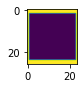

Checkbox bounding rectangle (x,y,width,height):  (110, 722, 34, 36)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


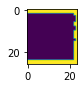

Checkbox bounding rectangle (x,y,width,height):  (104, 1024, 34, 34)
Result of `contains_pixels` for the checkbox:  True
Display the cropout of checkbox:


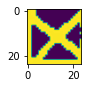

Checkbox bounding rectangle (x,y,width,height):  (102, 1298, 34, 34)
Result of `contains_pixels` for the checkbox:  False
Display the cropout of checkbox:


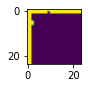

In [278]:
print("Output object type: ", type(checkboxes))
for checkbox in checkboxes:
    print("Checkbox bounding rectangle (x,y,width,height): ", checkbox[0])
    print("Result of `contains_pixels` for the checkbox: ", checkbox[1])
    print("Display the cropout of checkbox:")
    plt.figure(figsize=(1,1))
    plt.imshow(checkbox[2])
    plt.show()

In [ ]:
# IMPLEMENT HERE: ("Result of `contains_pixels` for the checkbox: ", checkbox[1]) (TRUE-FALSE) TO CSV-List

box_shift = 50 #shift-value for checkbox drawing for screening

#detect page from filename
import re #needed for regex in filename
page_detected = re.findall("page-[0-9]+",img) #isolate e.g. "page-1"
page_detected = re.findall("[0-9]+", page_detected[0]) #isolate number from e.g. "page-1" = "1"

for checkbox in checkboxes:
  cb_values = checkbox[0] #export list from checkbox-nd.array
  cb_xmin = cb_values[0] #x=width-axis
  cb_xmax = cb_values[0]+cb_values[2]
  cb_ymin = cb_values[1] #y=height-axis
  cb_ymax = cb_values[1]+cb_values[3]
  #print(cb_xmin, " - ", cb_xmax, " - ",cb_ymin, " - ",cb_ymax, " - ",) # only for debugging
  
  #MAKE CHECK IF CHECKBOX TWICE ON SAME COORDINATE AND IF A COORDINATE WITHOUT CHECKBOX EXISTS # WRITE ERROR CODES TO IMG AS RED TEXT!
  coord_page = "coord_page_{}".format(page_detected[0]) #
  print(coord_page)

  for i in eval(coord_page): # eval() is used to select variable based on string
    #TRY: CREATE ERROR HANDLER?
    print("Position {}: ".format(i), end="")
    if cb_xmin > i[0]-safety_border and cb_xmax < i[0]+safety_border and cb_ymin > i[1]-safety_border and cb_ymax < i[1]+safety_border:
      print("checkbox found, with value={}".format(checkbox[1])) #CREATE HERE INPUT TO CSV WITH TRUE/1 AND COMMA ++ DRAW Checkbox an value to COPY of image (subdirectory)
      if checkbox[1] == True:
        cv2.rectangle(img_annot, (cb_xmin-box_shift, cb_ymin), (cb_xmax-box_shift, cb_ymax), (255, 0, 0), -1)
        #cv2.rectangle(img_annot, (50, 50), (100, 100), (0, 255, 0), -1)
      elif checkbox[1] == False:
        cv2.rectangle(img_annot, (cb_xmin-box_shift, cb_ymin), (cb_xmax-box_shift, cb_ymax), (255, 0, 0), 2)
        #cv2.rectangle(img_annot, (50, 50), (100, 100), (0, 255, 0))
    else:
      print("not found") #CREATE HERE INPUT TO CSV WITH FALSE/0 AND COMMA
  print("--------") # NEW ROW IN CSV?
  

In [ ]:
cv2_imshow(img_annot)
# SAVE IMAGE WITH NEW NAME